#### Boston Dataset에 적용

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml

boston_dataset = fetch_openml(name='boston')

C:\Users\user\AppData\Local\Temp\ipykernel_3620\117257336.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 로드한 boston 전체 데이터에 key 값을 출력
print(boston_dataset.keys())
# boston 전체 데이터 중 data에 대한 전체 행, 열 길이를 출력
print(boston_dataset.data.shape)
# boston 데이터에 컬럼 이름을 출력 
print(boston_dataset.feature_names)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(506, 13)
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [3]:
print(boston_dataset.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

#### DataFrame 형태로 정제

In [4]:
data = pd.DataFrame(boston_dataset.data)
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88


In [5]:
# 칼럼명 변경
data.columns = boston_dataset.feature_names
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88


In [6]:
data['Price'] =  boston_dataset.target
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


### Scatter Plot

<Axes: xlabel='RM', ylabel='Price'>

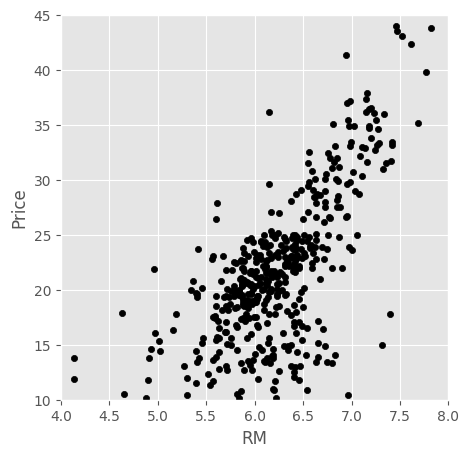

In [7]:
data.plot(kind='scatter', x ="RM", y="Price", figsize=(5, 5), color='black', xlim=(4,8), ylim=(10,45))

#### 데이터 학습

In [8]:
linear_regression = LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['RM']), y=data['Price'])
prediction = linear_regression.predict(X=pd.DataFrame(data['RM']))
print('a value: ', linear_regression.intercept_)
print('b value: ',linear_regression.coef_)

a value:  -34.67062077643857
b value:  [9.10210898]


#### 적합도 검증

In [9]:
residuals = data['Price'] - prediction
residuals.describe()

count    5.060000e+02
mean     2.134437e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [10]:
SSE = (residuals**2).sum()
SST = ((data['Price']-data['Price'].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ', R_squared)

R_squared:  0.48352545599133423


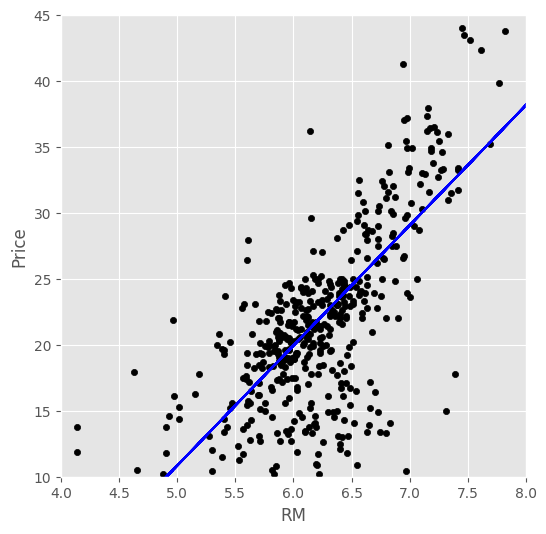

In [11]:
data.plot(kind='scatter', x='RM', y='Price', figsize=(6,6), color='black',
         xlim=(4,8), ylim=(10, 45))

plt.plot(data['RM'], prediction, color='b')

#### 성능 평가

In [12]:
from sklearn.metrics import mean_squared_error

print('score: ', linear_regression.score(X=pd.DataFrame(data['RM']), y= data['Price']))
print('Mean Squared Error: ', mean_squared_error(prediction, data['Price']))
print('RMSE: ', mean_squared_error(prediction, data['Price'])**.5)

score:  0.48352545599133423
Mean Squared Error:  43.60055177116956
RMSE:  6.603071389222561
